In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
hoteles = pd.read_csv('./data2/hoteles_compartidos.csv')
hoteles

,city_ta,comments_ta,name,prices_ta,quality_price_ta,rating_ta,stars_ta,rank_ta,heredados_ta,total_heredados_ta,...,acceso/comunicacion_bk,total_acceso/comunicacion_bk,entretenimiento/deporte_bk,total_entretenimiento/deporte_bk,inclusion,total_inclusion,ninios_bk,total_ninios_bk,comida/bebida_bk,total_comida/bebida_bk
0,Bacalar,3,Hotel Seyba Bakalar,3000.0,0.0,1.5,0.0,5,0,0,...,1,2,1,1,0,0,1,1,0,0
1,Bacalar,1,Siyan Ka'an Bak'halal,NaN,0.0,1.0,0.0,13,0,0,...,1,3,1,5,0,0,0,0,1,1
2,Bacalar,238,Villas Ecotucan,NaN,3.5,3.5,0.0,19,1,1,...,1,2,1,7,0,0,1,1,0,0
3,Bacalar,197,Hostal & Suites Pata de Perro,562.0,4.5,4.5,0.0,22,0,0,...,1,2,1,1,0,0,1,1,1,1
4,Bacalar,128,Hotel Hacienda Bacalar,950.0,4.0,3.5,3.0,23,0,0,...,1,1,1,1,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Todos Santos,95,Paradero Todos Santos - Experience Inclusive,12756.0,4.5,4.5,0.0,3,0,0,...,1,7,1,15,0,0,0,0,1,4
118,Todos Santos,69,Perro Surfero-Outsite Todos Santos,2199.0,5.0,4.5,0.0,6,0,0,...,1,2,1,11,0,0,1,3,1,4
119,Todos Santos,6,Hotel Casa Morelos,NaN,4.0,4.0,0.0,8,0,0,...,1,1,1,1,0,0,0,0,0,0
120,Todos Santos,13,Todos Santos Hostel super fast and stable sate...,NaN,5.0,4.5,0.0,9,0,0,...,1,4,1,13,0,0,0,0,1,6


In [3]:
hoteles.city_ta.value_counts()

Bacalar         61
Isla Mujeres    32
Loreto          14
Mazunte          7
Todos Santos     7
Sisal            1
Name: city_ta, dtype: int64

# Correlaciones

## Con estrellas

In [14]:
print("Estrellas")
for p in ["bk","ta"]:
    print(p)
    for m in ["kendall","pearson","spearman"]:
        corr =hoteles[f"stars_{p}"].corr(hoteles[f"rank_{p}"], method=m) #Booking porque son oficiales
        
        print(f"Correlación de {m} = {corr:.4f}")

Estrellas
bk
Correlación de kendall = -0.0775
Correlación de pearson = -0.0706
Correlación de spearman = -0.1076
ta
Correlación de kendall = -0.2920
Correlación de pearson = -0.3952
Correlación de spearman = -0.3768


## Con rating

In [13]:
print("Rating")
for p in ["bk","ta"]:
    print(p)
    for m in ["kendall","pearson","spearman"]:
        corr =hoteles[f"rating_{p}"].corr(hoteles[f"rank_{p}"], method=m) 
        
        print(f"Correlación de {m} = {corr:.4f}")

Rating
bk
Correlación de kendall = -0.0630
Correlación de pearson = -0.0592
Correlación de spearman = -0.0912
ta
Correlación de kendall = 0.0429
Correlación de pearson = 0.0357
Correlación de spearman = 0.0531


## Con comentarios

In [16]:
print("Comentarios")
for p in ["bk","ta"]:
    print(p)
    for m in ["kendall","pearson","spearman"]:
        corr =hoteles[f"comments_{p}"].corr(hoteles[f"rank_{p}"], method=m) 
        
        print(f"Correlación de {m} = {corr:.4f}")

Comentarios
bk
Correlación de kendall = 0.1114
Correlación de pearson = 0.1998
Correlación de spearman = 0.1720
ta
Correlación de kendall = -0.2252
Correlación de pearson = -0.2066
Correlación de spearman = -0.3186


## General

In [4]:
hoteles.rank_bk.corr(hoteles.rank_ta, method="kendall")

0.29458296983315135

In [5]:
hoteles.rank_bk.corr(hoteles.rank_ta, method="pearson")

0.3452791628566303

In [6]:
hoteles.rank_bk.corr(hoteles.rank_ta, method="spearman")

0.4193484970711641

In [45]:
#!mkdir plots

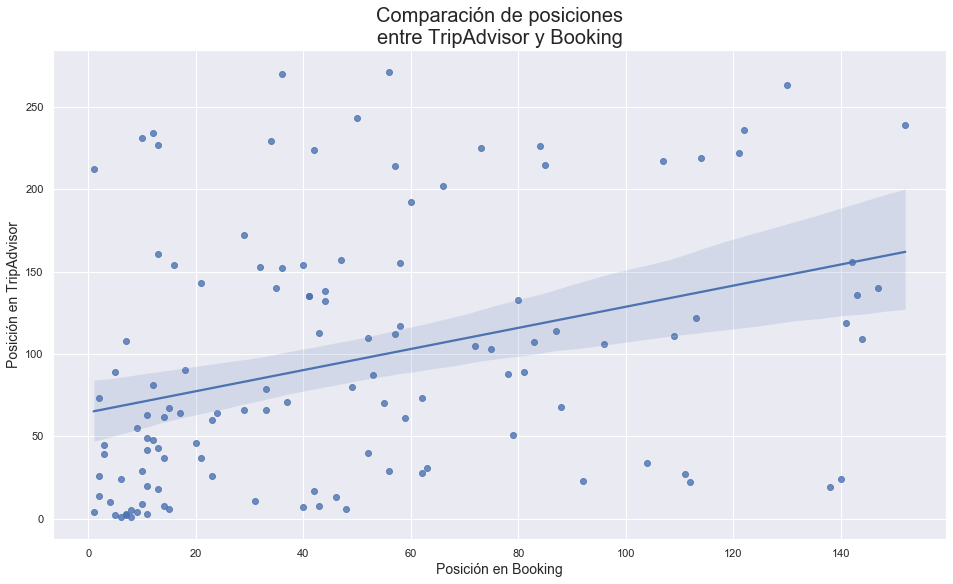

In [72]:
plt.figure(figsize=(16,9))
sns.regplot(data=hoteles, x="rank_bk", y="rank_ta", ci=95)
plt.title("Comparación de posiciones\nentre TripAdvisor y Booking", size=20)
plt.xlabel("Posición en Booking", size=14)
plt.ylabel("Posición en TripAdvisor",size=14)
plt.savefig("./plots/compGralTABK.svg")
plt.show()

## Por estrellas

Solo aplica para después de dos estrellas, dado que solamente hay un hotel con una estrella en TA

In [19]:
for s in range(2,6):
    estrellas = hoteles[(hoteles.stars_bk==s)|(hoteles.stars_ta==s)]

    kendall = estrellas.rank_bk.corr(estrellas.rank_ta, method="kendall")
    pearson = estrellas.rank_bk.corr(estrellas.rank_ta, method="pearson")
    spearman = estrellas.rank_bk.corr(estrellas.rank_ta, method="spearman")

    print(f"{s} ESTRELLAS")
    print(f"La correlación Kendall Tao es de {kendall:.4f}")
    print(f"La correlación Pearson es de {pearson:.4f}")
    print(f"La correlación Spearman es de {spearman:.4f}")
    print("\n")

2 ESTRELLAS
La correlación Kendall Tao es de 0.0753
La correlación Pearson es de 0.0378
La correlación Spearman es de 0.1280


3 ESTRELLAS
La correlación Kendall Tao es de 0.3847
La correlación Pearson es de 0.4715
La correlación Spearman es de 0.5155


4 ESTRELLAS
La correlación Kendall Tao es de 0.2060
La correlación Pearson es de 0.2441
La correlación Spearman es de 0.3005


5 ESTRELLAS
La correlación Kendall Tao es de 0.4089
La correlación Pearson es de 0.2738
La correlación Spearman es de 0.5641




## Por pueblo mágico

Solo aplica para después de dos estrellas, dado que solamente hay un hotel con una estrella

In [49]:
for pm in hoteles.city_ta.unique():
    pueblo = hoteles[(hoteles.city_ta==pm)]
    if pueblo.shape[0]==1:
        continue
    kendall = pueblo.rank_bk.corr(pueblo.rank_ta, method="kendall")
    pearson = pueblo.rank_bk.corr(pueblo.rank_ta, method="pearson")
    spearman = pueblo.rank_bk.corr(pueblo.rank_ta, method="spearman")

    print(pm.upper())
    print(f"La correlación Kendall Tao es de {kendall:.4f}")
    print(f"La correlación Pearson es de {pearson:.4f}")
    print(f"La correlación Spearman es de {spearman:.4f}")
    print("\n")

BACALAR
La correlación Kendall Tao es de -0.0033
La correlación Pearson es de -0.0209
La correlación Spearman es de -0.0016


ISLA MUJERES
La correlación Kendall Tao es de -0.0806
La correlación Pearson es de -0.0823
La correlación Spearman es de -0.0960


LORETO
La correlación Kendall Tao es de 0.3187
La correlación Pearson es de 0.4795
La correlación Spearman es de 0.4681


MAZUNTE
La correlación Kendall Tao es de 0.2381
La correlación Pearson es de 0.3184
La correlación Spearman es de 0.1786


TODOS SANTOS
La correlación Kendall Tao es de 0.4286
La correlación Pearson es de 0.5723
La correlación Spearman es de 0.5714




La correlación no es relevante